In [1]:
from tensorflow.keras.models import load_model
import numpy as np
from collections import Counter
from PQmodel import PQ,build_data
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

In [13]:
model = load_model("1C_PCA1.h5") ##Carga el Modelo


In [2]:
Muestras=500
Prueba = PQ(Cicles=10,PeriodoDisturbio=10,InicioDisturbio=0,FS=3841)
datosp = Prueba.PQaleatorio(Muestras)

In [3]:
ddp,targetp = build_data(datosp,cs=640)

Xtest,Ppca=myPCA(ddp,20)

In [14]:
resultado = model.predict(Xtest)

454/454 [==============================] - 1s 1ms/step


In [15]:
resultado.shape

(14500, 29)

In [10]:
def CrearCMdata(resultad,Muestras):
    yp,y=[],[]
    for k in range(Muestras):
        for v in range(29):
            senal=v
            y.append(v)
            yp.append(list(resultad[senal]).index(np.max(resultad[senal])))
    return np.array(y),np.array(yp)

In [16]:
t,tp=CrearCMdata(resultado,Muestras)
cmt =confusion_matrix(t,tp) 
f1_score(tp,t,average='weighted')

0.3367816091954023

<Axes: >

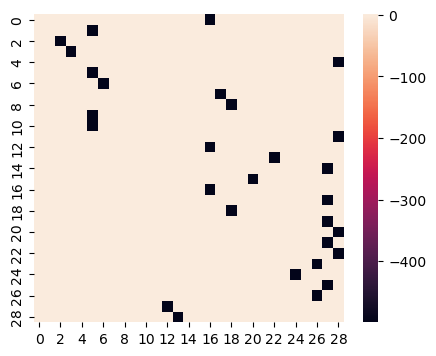

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cmt, ax=ax)

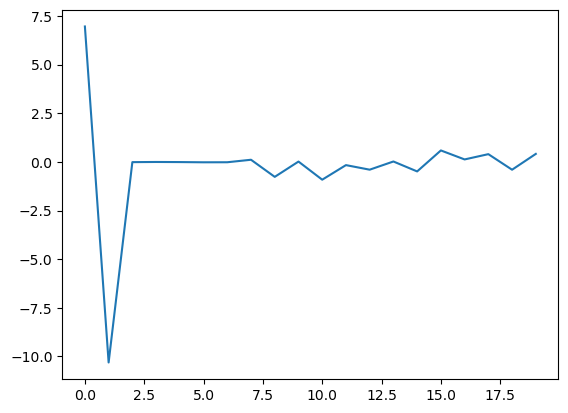

In [24]:
plt.plot(Xtest[5])
plt.show()